In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pizza_files = ['order_details.csv', 'orders.csv', 'pizza_types.csv', 'pizzas.csv']

dfs = [pd.read_csv(p, parse_dates=True, encoding='unicode escape') for p in pizza_files]

In [3]:
dfs[0].head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
dfs[1].head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
dfs[2].head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
dfs[2].shape

(32, 4)

In [7]:
dfs[3].head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [8]:
dfs[0] = dfs[0].merge(dfs[1], on='order_id', how='left')

In [9]:
dfs[0].head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [10]:
dfs[0] = dfs[0].merge(dfs[3], on='pizza_id', how='left')
dfs[0].head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00


In [11]:
pizza_df = dfs[0].merge(dfs[2], on='pizza_type_id', how='left')
pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [12]:
pizza_df.shape

(48620, 12)

In [13]:
pizza_df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [14]:
pizza_df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [15]:
#dropping the ingredients details
pizza_df = pizza_df.drop('ingredients', axis=1)

In [16]:
pizza_df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie


In [17]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [18]:
#dropping dublicates
pizza_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

In [19]:
pizza_df.drop_duplicates()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie


In [20]:
#Total orders
total_orders = pizza_df['order_id'].nunique()
total_orders

21350

In [21]:
#Average Daily Orders
total_no_of_days = pizza_df['date'].nunique()
average_orders = round(total_orders/total_no_of_days)
average_orders 

60

In [22]:
#Number of order details
no_of_order_details = pizza_df['order_details_id'].nunique()
no_of_order_details

48620

In [23]:
#Average number of pizza in an order
average_pizzas_in_an_order = round(no_of_order_details/total_orders)
average_pizzas_in_an_order

2

In [24]:
#Average pizzas sold in a day
average_pizzas_in_a_day = round(no_of_order_details/total_no_of_days)
average_pizzas_in_a_day

136

In [25]:
#creating the month column
pizza_df['date'] = pizza_df['date'].astype('datetime64[ns]')
pizza_df['month'] = pizza_df['date'].dt.month
pizza_df['month'] = pizza_df['month'].map({1 : 'January', 2 : 'Febraury', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'})                            
pizza_df['month'].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [26]:
#Total sales
total_sales = (pizza_df['quantity'] * pizza_df['price']).sum()
total_sales

817860.05

In [27]:
#Monthly sales trends
pizza_df['total_sales'] = pizza_df['quantity'] * pizza_df['price']
pizza_df['total_sales'].head()

0    13.25
1    16.00
2    18.50
3    20.75
4    16.00
Name: total_sales, dtype: float64

In [28]:
#monthly sales
monthly_sales = pizza_df.groupby('month')['total_sales'].sum().sort_values(ascending=False)
monthly_sales

month
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
Febraury     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Total Monthly Sales')

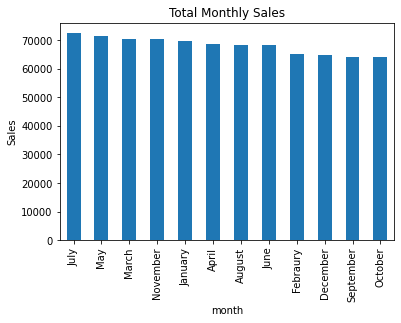

In [29]:
monthly_sales.plot(kind='bar')
plt.ylabel('Sales')
plt.title('Total Monthly Sales')

In [30]:
#Adding a day column to explore how sales change daily
pizza_df['day'] = pizza_df['date'].dt.weekday
pizza_df['day'].head()

0    3
1    3
2    3
3    3
4    3
Name: day, dtype: int64

In [31]:
    pizza_df['day'].value_counts()

4    8106
5    7355
3    7323
2    6797
1    6753
0    6369
6    5917
Name: day, dtype: int64

In [32]:
pizza_df['day'].dtype

dtype('int64')

In [33]:
pizza_df['day'] = pizza_df['day'].map({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
pizza_df['day'].head()

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: day, dtype: object

In [34]:
daily_sales = pizza_df.groupby('day')['total_sales'].sum().sort_values(ascending=False)
daily_sales

day
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_sales, dtype: float64

Text(0.5, 0, '')

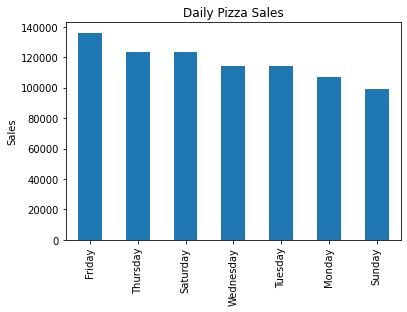

In [35]:
daily_sales.plot(kind='bar')
plt.title("Daily Pizza Sales")
plt.ylabel('Sales')
plt.xlabel('')

In [36]:
#Peak hours
pizza_df['time'] = pd.to_datetime(pizza_df['time'])
pizza_df['hour'] = pizza_df['time'].dt.hour
pizza_df['hour'].head()

0    11
1    11
2    11
3    11
4    11
Name: hour, dtype: int64

In [37]:
hourly_sales = pizza_df.groupby('hour')['total_sales'].sum().sort_values(ascending=False).reset_index()
hourly_sales

,hour,total_sales
0,12,111877.90
1,13,106065.70
2,18,89296.85
3,17,86237.45
4,19,72628.90
5,16,70055.40
6,14,59201.40
7,20,58215.40
8,15,52992.30
9,11,44935.80


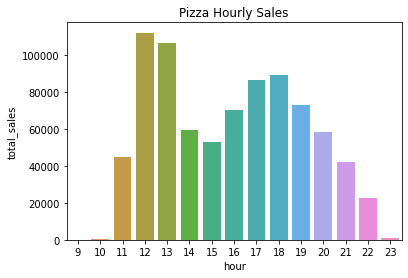

In [38]:
#Visualizing hourly sales
sns.barplot(x='hour', y='total_sales', data=hourly_sales)
plt.title("Pizza Hourly Sales")
plt.show()

In [39]:
#Most selling Pizza category
category_sales = pizza_df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
category_sales

category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='category'>

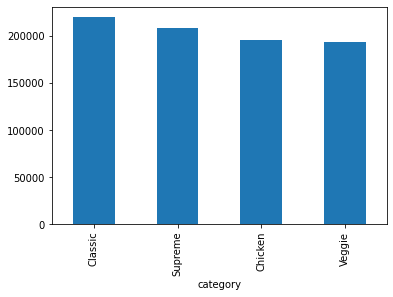

In [40]:
category_sales.plot(kind='bar')

In [41]:
categorical_sales = category_sales.reset_index()
categorical_sales

,category,total_sales
0,Classic,220053.10
1,Supreme,208197.00
2,Chicken,195919.50
3,Veggie,193690.45


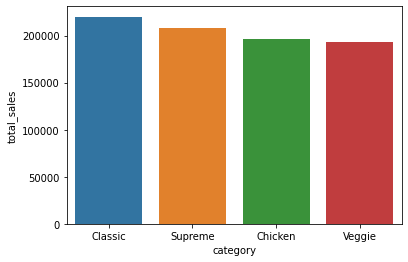

In [42]:
sns.barplot(x='category', y='total_sales', data=categorical_sales)
plt.show()

In [54]:
#Analysing to extract which pizza type sales more
pizza_type_sales = pizza_df.groupby(["category", "name"]).agg({'total_sales':'sum'}).sort_values(['category', 'total_sales'],ascending=[True,False])
pizza_type_sales

total_sales
category name                                                   
Chicken  The Thai Chicken Pizza                         43434.25
         The Barbecue Chicken Pizza                     42768.00
         The California Chicken Pizza                   41409.50
         The Southwest Chicken Pizza                    34705.75
         The Chicken Alfredo Pizza                      16900.25
         The Chicken Pesto Pizza                        16701.75
Classic  The Classic Deluxe Pizza                       38180.50
         The Hawaiian Pizza                             32273.25
         The Pepperoni Pizza                            30161.75
         The Greek Pizza                                28454.10
         The Italian Capocollo Pizza                    25094.00
         The Napolitana Pizza                           24087.00
         The Big Meat Pizza                             22968.00
         The Pepperoni, Mushroom, and Peppers Pizza     18834.50
Supreme  The Spicy Italian Pizza                        34831.25
         The Italian Supreme Pizza                      33476.75
         The Sicilian Pizza                             30940.50
         The Pepper Salami Pizza                        25529.00
         The Prosciutto and Arugula Pizza               24193.25
         The Soppressata Pizza                          16425.75
         The Calabrese Pizza                            15934.25
         The Spinach Supreme Pizza                      15277.75
         The Brie Carre Pizza                           11588.50
Veggie   The Four Cheese Pizza                          32265.70
         The Mexicana Pizza                             26780.75
         The Five Cheese Pizza                          26066.50
         The Vegetables + Vegetables Pizza              24374.75
         The Spinach and Feta Pizza                     23271.25
         The Italian Vegetables Pizza                   16019.25
         The Spinach Pesto Pizza                        15596.00
         The Mediterranean Pizza                        15360.50
         The Green Garden Pizza                         13955.75

In [44]:
#Extracting the 10 most selling pizza
pizza_sales_name = pizza_df.groupby(['name', 'category'])['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
pizza_sales_name

,name,category,total_sales
0,The Thai Chicken Pizza,Chicken,43434.25
1,The Barbecue Chicken Pizza,Chicken,42768.00
2,The California Chicken Pizza,Chicken,41409.50
3,The Classic Deluxe Pizza,Classic,38180.50
4,The Spicy Italian Pizza,Supreme,34831.25
5,The Southwest Chicken Pizza,Chicken,34705.75
6,The Italian Supreme Pizza,Supreme,33476.75
7,The Hawaiian Pizza,Classic,32273.25
8,The Four Cheese Pizza,Veggie,32265.70
9,The Sicilian Pizza,Supreme,30940.50


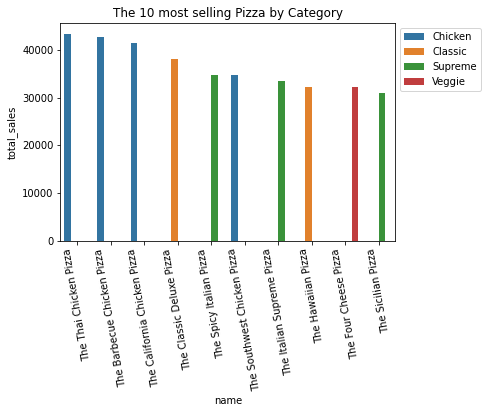

In [45]:
plt.title('The 10 most selling Pizza by Category')

p = sns.barplot(x='name', y='total_sales', hue='category', data=pizza_sales_name)
p.legend(bbox_to_anchor = (1.0, 1))
p.set_xticklabels(p.get_xticklabels(), rotation=100)
plt.show()

Though Classic pizza generates more revenue than Chicken Pizza but from the above analysis, it shows that chicken pizza types dominate the market than classic pizzas because out of the 10 most selling pizza types, 4 are from chicken, 2 are from classic, 3 from supreme and 2 from veggie.

In [75]:
#Comparison by price
chicken_prices = pizza_df[pizza_df['category']=='Chicken']
chicken_prices.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,month,total_sales,day,hour
5,6,2,thai_ckn_l,1,2015-01-01,2023-03-23 11:57:40,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,January,20.75,Thursday,11
10,11,6,bbq_ckn_s,1,2015-01-01,2023-03-23 12:29:36,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,January,12.75,Thursday,12
24,25,10,southw_ckn_l,1,2015-01-01,2023-03-23 13:00:15,southw_ckn,L,20.75,The Southwest Chicken Pizza,Chicken,January,20.75,Thursday,13
25,26,11,bbq_ckn_l,1,2015-01-01,2023-03-23 13:02:59,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,January,20.75,Thursday,13
26,27,11,cali_ckn_l,1,2015-01-01,2023-03-23 13:02:59,cali_ckn,L,20.75,The California Chicken Pizza,Chicken,January,20.75,Thursday,13


In [ ]:
chicken_prices = chicken_prices.groupby('name')['price'].agg([max, min, np.mean])
chicken_prices

In [79]:
classic_prices = pizza_df[pizza_df['category']=='Classic']
classic_prices.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,month,total_sales,day,hour
0,1,1,hawaiian_m,1,2015-01-01,2023-03-23 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,January,13.25,Thursday,11
1,2,2,classic_dlx_m,1,2015-01-01,2023-03-23 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,January,16.00,Thursday,11
11,12,6,the_greek_s,1,2015-01-01,2023-03-23 12:29:36,the_greek,S,12.00,The Greek Pizza,Classic,January,12.00,Thursday,12
14,15,9,classic_dlx_s,1,2015-01-01,2023-03-23 12:52:01,classic_dlx,S,12.00,The Classic Deluxe Pizza,Classic,January,12.00,Thursday,12
16,17,9,ital_cpcllo_l,1,2015-01-01,2023-03-23 12:52:01,ital_cpcllo,L,20.50,The Italian Capocollo Pizza,Classic,January,20.50,Thursday,12


In [83]:
classic_prices.groupby('name')['price'].agg([max, min, np.mean])

,max,min,mean
name,,,
The Big Meat Pizza,12.00,12.00,12.000000
The Classic Deluxe Pizza,20.50,12.00,15.575952
The Greek Pizza,35.95,12.00,20.035633
The Hawaiian Pizza,16.50,10.50,13.317194
The Italian Capocollo Pizza,20.50,12.00,17.426803
The Napolitana Pizza,20.50,12.00,16.437285
The Pepperoni Pizza,15.25,9.75,12.468658
"The Pepperoni, Mushroom, and Peppers Pizza",17.50,11.00,13.865127


In [72]:
pizza_prices.tail()

amax                           amin  \
category                          Chicken Classic Supreme Veggie Chicken   
name                                                                       
The Spinach Pesto Pizza              0.00     0.0    0.00  20.75    0.00   
The Spinach Supreme Pizza            0.00     0.0   20.75   0.00    0.00   
The Spinach and Feta Pizza           0.00     0.0    0.00  20.25    0.00   
The Thai Chicken Pizza              20.75     0.0    0.00   0.00   12.75   
The Vegetables + Vegetables Pizza    0.00     0.0    0.00  20.25    0.00   

                                                          
category                          Classic Supreme Veggie  
name                                                      
The Spinach Pesto Pizza               0.0     0.0   12.5  
The Spinach Supreme Pizza             0.0    12.5    0.0  
The Spinach and Feta Pizza            0.0     0.0   12.0  
The Thai Chicken Pizza                0.0     0.0    0.0  
The Vegetables + Vegetables Pizza     0.0     0.0   12.0

In [46]:
#Most selling size
pizza_df.pivot_table(values='total_sales', index='size', columns='category', aggfunc=np.sum)

category,Chicken,Classic,Supreme,Veggie
size,,,,
L,102339.0,74518.50,94258.5,104202.70
M,65224.5,60581.75,66475.0,57101.00
S,28356.0,69870.25,47463.5,32386.75
XL,NaN,14076.00,NaN,NaN
XXL,NaN,1006.60,NaN,NaN


In [47]:
pizza_sales_by_size = pizza_df.groupby('size')['quantity', 'total_sales'].sum().reset_index()
pizza_sales_by_size

,size,quantity,total_sales
0,L,18956,375318.70
1,M,15635,249382.25
2,S,14403,178076.50
3,XL,552,14076.00
4,XXL,28,1006.60


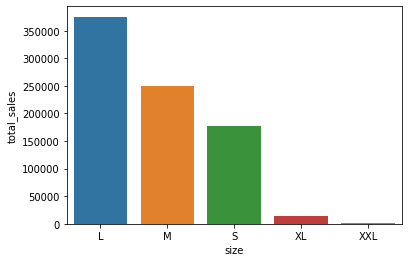

In [48]:
sns.barplot(x='size', y='total_sales', data=pizza_sales_by_size)
plt.show()

In [52]:
#Percentage of sales by Size
pizza_df['size'].value_counts(normalize=True)

L      0.381037
M      0.316434
S      0.290765
XL     0.011189
XXL    0.000576
Name: size, dtype: float64

From the above analysis, the large sized pizza dominates the market with 38%, Then m